In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('recons-our-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCTTCGTTGTATCTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCCAGGGTATATGGT...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 93549.77it/s]


[8, 72, 84, 88, 106, 125, 145, 145, 167, 173, 171, 216, 209, 231, 215, 261, 269, 284, 280, 325, 321, 331, 373, 372, 388, 407, 409, 415, 438, 451, 454, 474, 485, 521, 522, 536, 539, 576, 559, 616, 611, 609, 634, 651, 654, 674, 690, 719, 710, 728, 723, 771, 771, 791, 1502, 1458, 1440, 1421, 1429, 1419, 1401, 1375, 1379, 1361, 1405, 1340, 1305, 1285, 1289, 1326, 1264, 1268, 1240, 1249, 1258, 1239, 1200, 1192, 1189, 1192, 1169, 1134, 1132, 1145, 1100, 1094, 1084, 1045, 1063, 1027, 1013, 1032, 1013, 1005, 994, 963, 951, 941, 944, 909, 893, 900, 922, 875, 853, 867, 832, 1005, 588, 560]


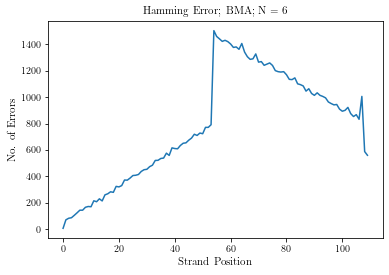

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-our-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:03<00:00, 2633.82it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


G -> TC 6
ACG ->  6
CC ->  6
A -> GC 7
GA -> C 7
C -> TG 8
 -> AA 9
A -> TG 9
GC ->  9
AT ->  9
C -> TTT 10
A -> TC 11
 -> TTT 11
 -> CG 12
A -> GT 13
A -> GG 13
A -> CT 13
CG ->  13
A -> TTT 13
GT ->  13
 -> AC 13
G -> TTT 13
AC ->  14
AA ->  14
TC ->  14
 -> GG 15
 -> GT 16
 -> TG 16
TG ->  16
 -> GC 16
G -> CT 17
TA ->  17
 -> GA 18
 -> AG 19
 -> AT 20
GA ->  20
 -> TA 22
 -> TC 24
G -> A 24
 -> CA 25
AG ->  25
G -> CC 26
CA ->  27
A -> CC 30
 -> CC 32
 -> CT 34
T -> A 35
C -> A 37
T -> G 39
G -> TT 42
C -> G 47
C -> TT 47
T -> C 51
 -> TT 60
A -> TT 67
G -> C 352
A -> G 403
T ->  404
C -> T 422
G -> T 423
A -> C 459
 -> A 490
A -> T 539
 -> G 569
 -> C 657
C ->  665
 -> T 769
G ->  937
A ->  1329


G -> C @ 37 6
 -> T @ 7 6
A -> C @ 27 6
A -> C @ 95 6
C ->  @ 37 6
A -> T @ 2 6
A -> T @ 36 6
A -> T @ 19 6
 -> C @ 108 6
A -> T @ 91 6
A -> T @ 86 6
A ->  @ 97 6
A ->  @ 61 6
 -> T @ 77 6
A -> T @ 53 6
A -> T @ 42 6
G ->  @ 1 6
A -> G @ 2 6
C -> T @ 60 6
A -> T @ 70 6
G ->  @ 10 6
C -> T @ 107 6
A ->  @ 92 6
 -> T @ 107 6
A ->  @ 98 6
G ->  @ 101 6
G ->  @ 102 6
A -> G @ 24 6
A -> C @ 11 6
C -> T @ 15 6
G ->  @ 104 6
C ->  @ 34 6
G -> C @ 20 6
A ->  @ 93 6
 -> CT @ 53 6
C ->  @ 41 6
A -> T @ 33 6
A -> T @ 28 6
A -> T @ 84 6
A -> C @ 22 6
G -> C @ 66 6
G -> T @ 20 6
G ->  @ 52 6
A ->  @ 81 6
 -> G @ 50 6
G ->  @ 16 6
A -> G @ 57 6
A -> T @ 109 6
A ->  @ 4 6
A ->  @ 69 6
A -> G @ 9 6
A -> C @ 63 6
G -> T @ 56 6
A ->  @ 14 6
G ->  @ 99 6
C ->  @ 61 6
G ->  @ 98 6
A ->  @ 10 6
G ->  @ 66 6
A -> T @ 10 6
A ->  @ 32 6
G ->  @ 7 6
A ->  @ 37 6
 -> TT @ 106 6
A -> C @ 44 6
G ->  @ 90 6
A ->  @ 34 6
A ->  @ 1 6
G -> T @ 75 6
G ->  @ 85 6
A -> T @ 101 6
A -> T @ 12 6
G ->  @ 21 6
G -> C @ 92 6


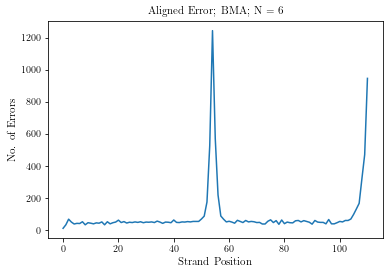

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-our-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 6, 12, 15, 6, 11, 4, 12, 7, 5, 6, 7, 7, 7, 6, 2, 8, 4, 5, 3, 7, 7, 9, 4, 11, 5, 9, 8, 9, 7, 10, 6, 6, 5, 6, 10, 8, 6, 11, 10, 8, 8, 12, 8, 5, 3, 11, 9, 6, 6, 9, 9, 14, 19, 37, 87, 21, 13, 11, 7, 7, 6, 5, 8, 11, 12, 10, 7, 11, 6, 7, 13, 8, 4, 5, 8, 9, 11, 9, 9, 7, 6, 10, 7, 7, 13, 6, 14, 9, 8, 8, 7, 6, 6, 7, 5, 15, 6, 6, 7, 9, 9, 11, 9, 13, 23, 28, 34, 60, 76, 141]
[0, 6, 12, 6, 1, 3, 5, 6, 1, 5, 6, 5, 3, 5, 4, 7, 6, 0, 1, 7, 4, 6, 8, 6, 5, 5, 6, 2, 3, 6, 9, 2, 4, 1, 8, 4, 2, 4, 4, 1, 8, 6, 3, 5, 8, 5, 6, 4, 8, 6, 7, 4, 6, 10, 45, 83, 23, 10, 7, 7, 5, 10, 5, 9, 9, 5, 6, 8, 7, 1, 5, 8, 5, 2, 3, 10, 4, 5, 5, 5, 3, 4, 2, 5, 11, 6, 8, 8, 5, 2, 6, 8, 8, 8, 3, 2, 7, 2, 6, 6, 8, 6, 6, 5, 6, 14, 19, 18, 35, 47, 106]
[1, 3, 3, 0, 0, 1, 0, 6, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 3, 1, 3, 2, 1, 1, 0, 4, 2, 3, 3, 4, 4, 26, 87, 219, 48, 11, 4, 2, 2, 0, 1, 1, 3, 2, 3, 3, 3, 3, 3, 4, 1, 1, 1, 3, 2, 2, 6, 0, 0, 2, 1, 5, 2, 3, 1, 0, 3, 0, 1, 3,

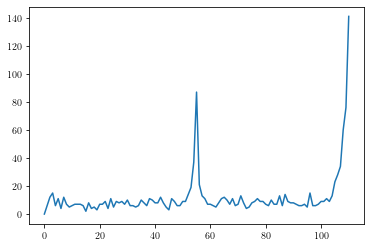

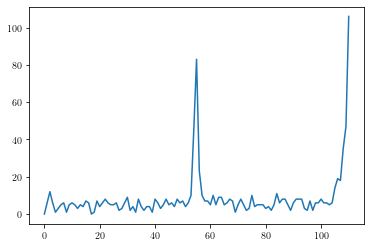

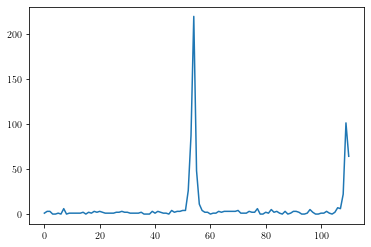

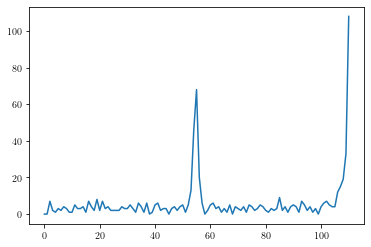

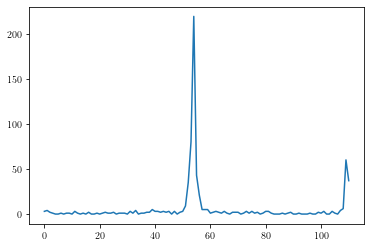

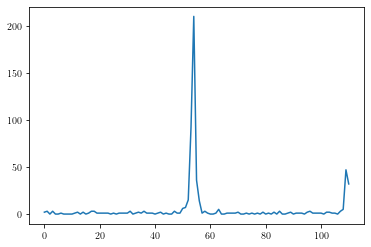

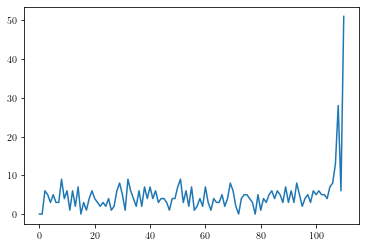

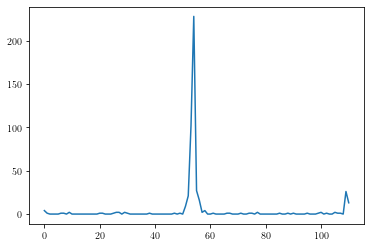

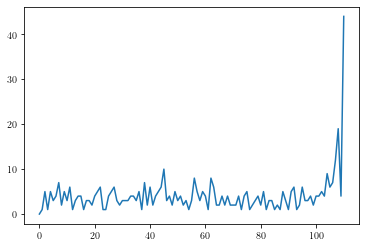

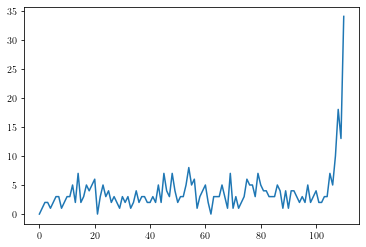

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)